In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Pclass', ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


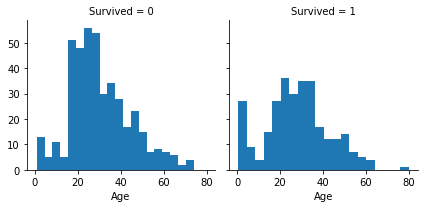

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins = 20)
plt.show()

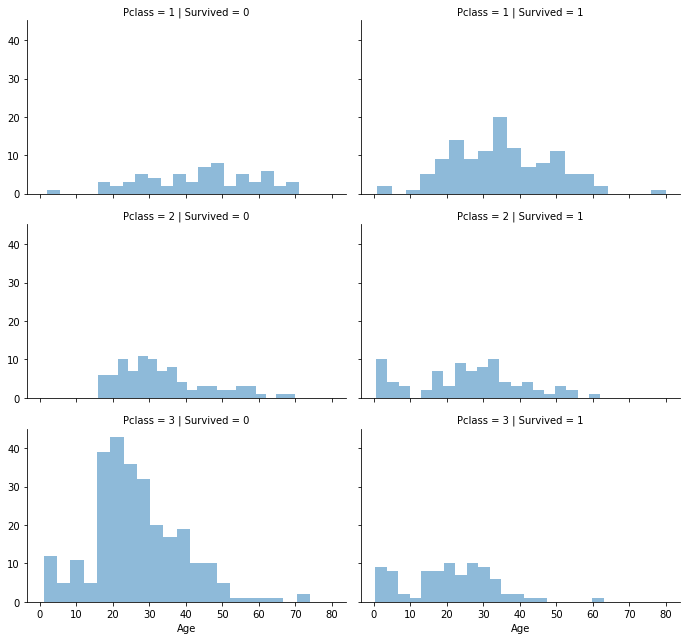

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue = 'Survived')
grid = sns.FacetGrid(train_df, col='Survived', row = 'Pclass', height=3, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


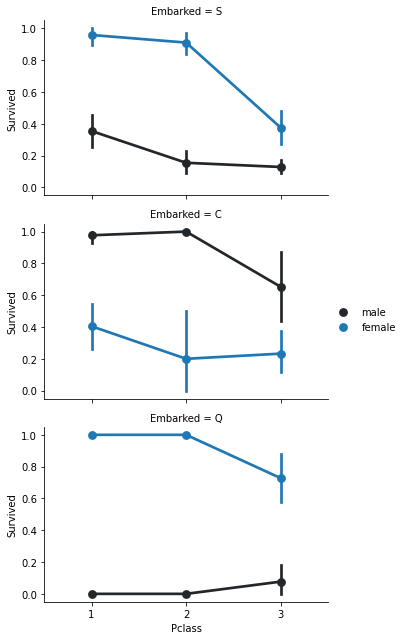

In [15]:
grid = sns.FacetGrid(train_df, row = 'Embarked', height = 3, aspect  = 1.6)
#grid.map(sns.pointplot,'Pclass','Survived','Sex', pallete='deep')
grid.map(sns.pointplot,'Pclass','Survived', 'Sex', pallete='deep')

grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


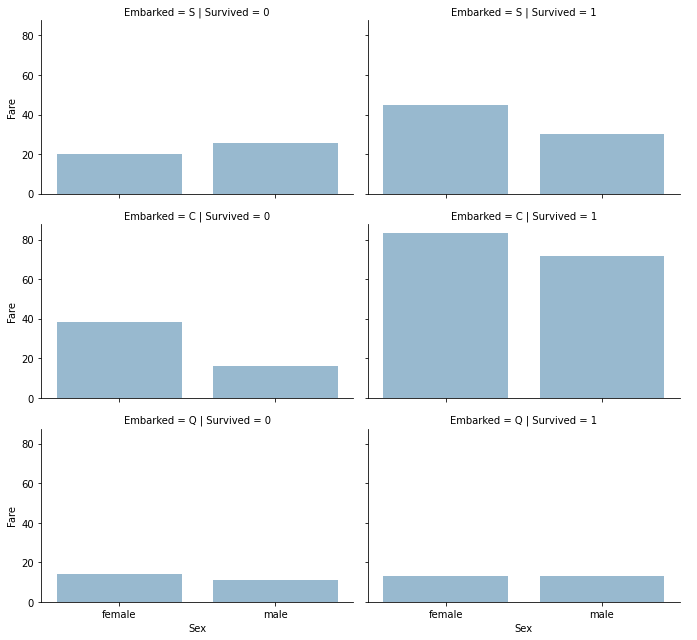

In [16]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col='Survived', size =3, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
#train_df = train_df.drop(['Tickect', 'Cabin'], axis = 1)
#train_df = train_df.drop(['Cabin'], axis = 1)
#test_df = test_df.drop(['Tickect', 'Cabin'], axis = 1)
#test_df = test_df.drop(['Cabin'], axis = 1)
combine = [train_df, test_df]
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 12) (418, 11) (891, 12) (418, 11)


In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+\.)', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [19]:
title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [20]:
train_df = train_df.drop(['Name', "PassengerId"], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 11), (418, 11))

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female" : 1, "male" : 0}).astype(int)


In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,0.0
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


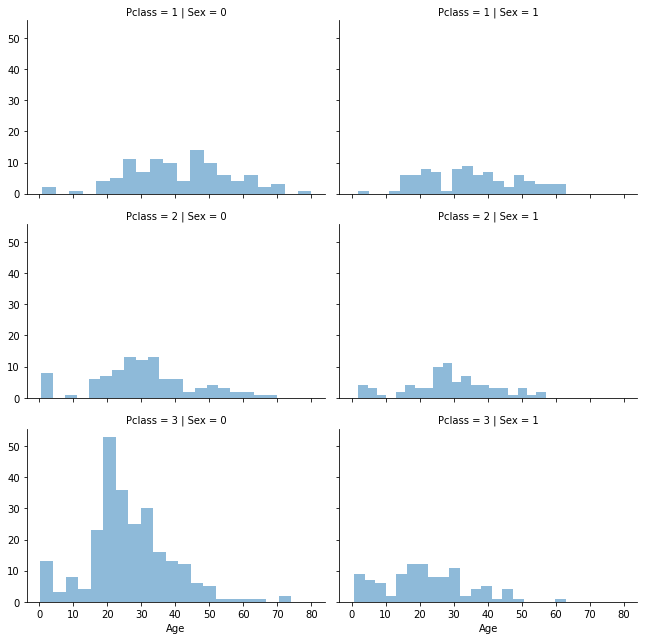

In [23]:
#grid = sns.FacetGrid(train_df, col = 'Pclass' , hue = 'Gender')
grid = sns.FacetGrid(train_df, row = 'Pclass' , col = 'Sex' , height = 3, aspect = 1.5)
grid.map(plt.hist, 'Age' , alpha = .5, bins = 20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == 1) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            


    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1) ,  'Age' ] = guess_ages[i, j]
            
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0.0
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,0.0
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,1,1,1,35,1,0,113803,53.1000,C123,S,0.0
4,0,3,0,35,0,0,373450,8.0500,NaN,S,0.0


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.386282
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,0.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,0.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,0.0,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0.0
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,0.0
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,1,1,1,2,1,0,113803,53.1000,C123,S,0.0
4,0,3,0,2,0,0,373450,8.0500,NaN,S,0.0


In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] =1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.346575
1,1,0.552795


In [31]:
trakn_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0.0,1,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,0.0,1,1
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,0
3,1,1,1,2,1,0,113803,53.1000,C123,S,0.0,1,1
4,0,3,0,2,0,0,373450,8.0500,NaN,S,0.0,0,0


In [32]:
#trakn_df = train_df.drop(['Ticket', 'Fare'], axis = 1)
#test_df = test_df.drop(['Ticket', 'Fare'], axis = 1)
trakn_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)


In [33]:
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0.0,1,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,0.0,1,1
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0,0
3,1,1,1,2,1,0,113803,53.1000,C123,S,0.0,1,1
4,0,3,0,2,0,0,373450,8.0500,NaN,S,0.0,0,0


In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,0,0,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,0,0.0,1,1,3
1,1,1,1,2,1,0,PC 17599,71.2833,C85,1,0.0,1,1,2
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,0,0,3
3,1,1,1,2,1,0,113803,53.1000,C123,0,0.0,1,1,2
4,0,3,0,2,0,0,373450,8.0500,NaN,0,0.0,0,0,6


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,NaN,2,0.0,0,6
1,893,3,1,2,7.0000,NaN,0,0.0,1,6
2,894,2,0,3,9.6875,NaN,2,0.0,0,6
3,895,3,0,1,8.6625,NaN,0,0.0,0,3
4,896,3,1,1,12.2875,NaN,0,0.0,0,3


In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by='FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91 , 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2    
    dataset.loc[(dataset['Fare'] > 31) , 'Fare'] = 3
    
    
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,A/5 21171,0.0,NaN,0,0.0,1,1,3
1,1,1,1,2,1,0,PC 17599,3.0,C85,1,0.0,1,1,2
2,1,3,1,1,0,0,STON/O2. 3101282,1.0,NaN,0,0.0,0,0,3
3,1,1,1,2,1,0,113803,3.0,C123,0,0.0,1,1,2
4,0,3,0,2,0,0,373450,1.0,NaN,0,0.0,0,0,6
5,0,3,0,0,0,0,330877,1.0,NaN,2,0.0,0,0,0
6,0,1,0,3,0,0,17463,3.0,E46,0,0.0,0,0,3
7,0,3,0,0,3,1,349909,2.0,NaN,0,0.0,4,0,0
8,1,3,1,1,0,2,347742,1.0,NaN,0,0.0,2,0,3
9,1,2,1,0,1,0,237736,2.0,NaN,1,0.0,1,1,0


In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,NaN,2,0.0,0,6
1,893,3,1,2,0.0,NaN,0,0.0,1,6
2,894,2,0,3,1.0,NaN,2,0.0,0,6
3,895,3,0,1,1.0,NaN,0,0.0,0,3
4,896,3,1,1,1.0,NaN,0,0.0,0,3
5,897,3,0,0,1.0,NaN,0,0.0,0,0
6,898,3,1,1,0.0,NaN,2,0.0,0,3
7,899,2,0,1,2.0,NaN,0,0.0,0,2
8,900,3,1,1,0.0,NaN,1,0.0,0,3
9,901,3,0,1,2.0,NaN,0,0.0,0,3


In [42]:
test_df = test_df.drop(['Cabin'], axis= 1)

In [43]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,0.0,0,6
1,893,3,1,2,0.0,0,0.0,1,6
2,894,2,0,3,1.0,2,0.0,0,6
3,895,3,0,1,1.0,0,0.0,0,3
4,896,3,1,1,1.0,0,0.0,0,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1.0,0,0.0,0,0
414,1306,1,1,2,3.0,1,0.0,0,2
415,1307,3,0,2,0.0,0,0.0,0,6
416,1308,3,0,0,1.0,0,0.0,0,0


In [44]:
train_df = train_df.drop(['Ticket', 'Cabin', 'FamilySize'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,1,0,0.0,0,0.0,1,3
1,1,1,1,2,1,0,3.0,1,0.0,1,2
2,1,3,1,1,0,0,1.0,0,0.0,0,3
3,1,1,1,2,1,0,3.0,0,0.0,1,2
4,0,3,0,2,0,0,1.0,0,0.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1.0,0,0.0,0,2
887,1,1,1,1,0,0,2.0,0,0.0,0,1
888,0,3,1,0,1,2,2.0,0,0.0,0,0
889,1,1,0,1,0,0,2.0,1,0.0,0,1


In [45]:


train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0.0,0,0.0,1,3
1,1,1,1,2,3.0,1,0.0,1,2
2,1,3,1,1,1.0,0,0.0,0,3
3,1,1,1,2,3.0,0,0.0,1,2
4,0,3,0,2,1.0,0,0.0,0,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1.0,0,0.0,0,2
887,1,1,1,1,2.0,0,0.0,0,1
888,0,3,1,0,2.0,0,0.0,0,0
889,1,1,0,1,2.0,1,0.0,0,1


In [63]:
X_train = train_df.drop('Survived', axis= 1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId'], axis = 1).copy()
#Y_test = test_df['Survived']
X_train.shape, Y_train.shape, X_test.shape#, Y_test.shape

((891, 8), (891,), (418, 8))

In [65]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0.0,2,0.0,0,6
1,893,3,1,2,0.0,0,0.0,1,6
2,894,2,0,3,1.0,2,0.0,0,6
3,895,3,0,1,1.0,0,0.0,0,3
4,896,3,1,1,1.0,0,0.0,0,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1.0,0,0.0,0,0
414,1306,1,1,2,3.0,1,0.0,0,2
415,1307,3,0,2,0.0,0,0.0,0,6
416,1308,3,0,0,1.0,0,0.0,0,0


In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.34

In [48]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.501930
4,Embarked,0.203434
6,IsAlone,0.107633
3,Fare,0.002397
5,Title,0.000000
7,Age*Class,-0.084265
2,Age,-0.133019
0,Pclass,-0.990149


In [49]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

79.46

In [50]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.58

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.76

In [52]:

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

71.27

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.75

In [55]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.65

In [56]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.11

In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
8,Decision Tree,85.75
1,KNN,80.58
0,Support Vector Machines,79.46
2,Logistic Regression,78.34
7,Linear SVC,78.11
4,Naive Bayes,75.76
6,Stochastic Gradient Decent,75.65
5,Perceptron,71.27


In [69]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [70]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((712, 8), (179, 8), (712,), (179,))

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<AxesSubplot:title={'center':'LightGBM MAE 0.3326 and MAPE inf'}, xlabel='Real_Bending', ylabel='Predict_Bending'>

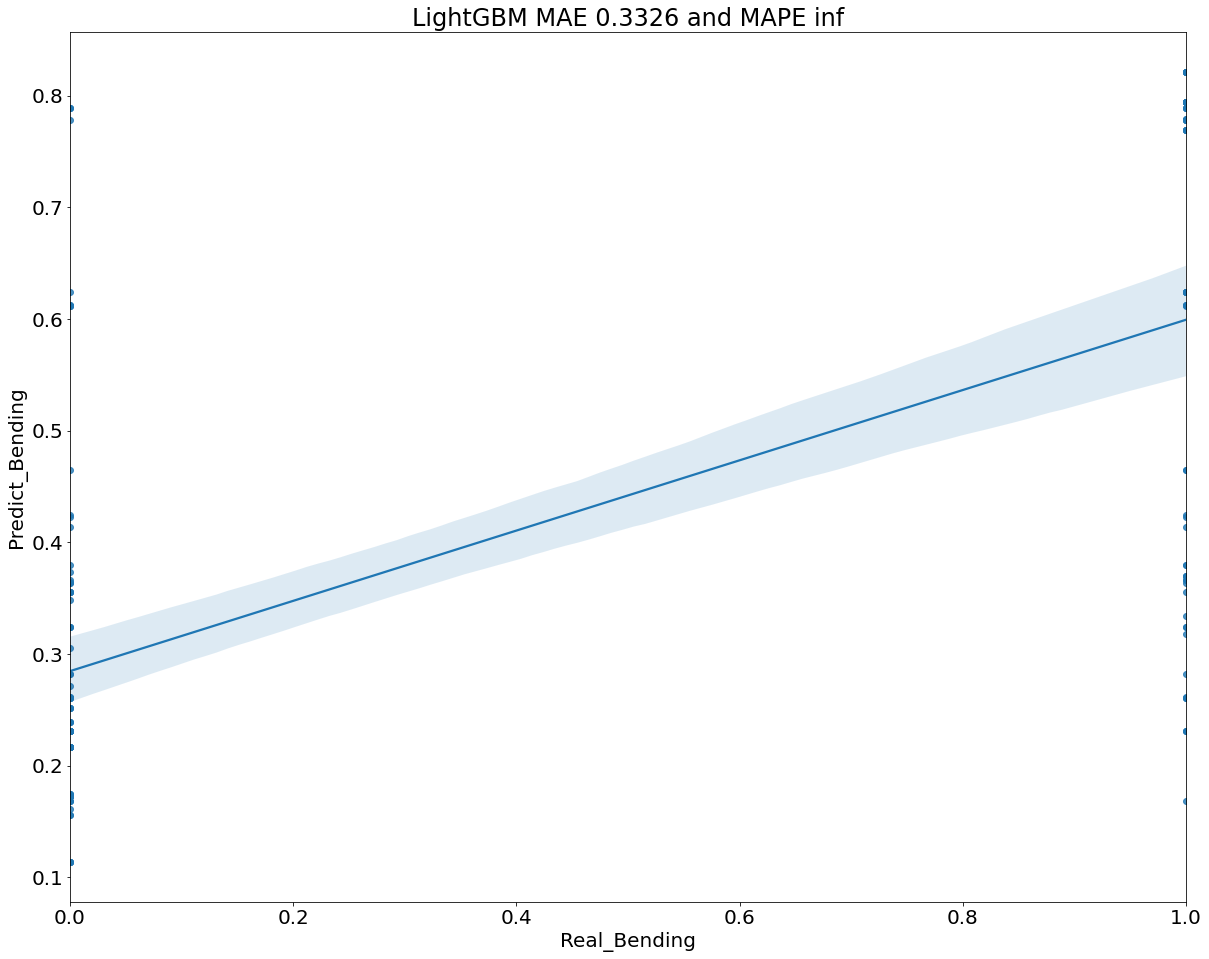

In [83]:
params = {'learning_rate': 0.005, 
          'max_depth': 4, 
          'boosting': 'gbdt', 
          #'objective': 'regression', 
          #'metric': 'mse', 
          'objective': 'binary', 
          'metric': 'binary_logloss', 
          'is_training_metric': True, 
          'num_leaves': 16,
         }

train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

model = lgb.train(params, train_ds, 250, test_ds, verbose_eval=100, early_stopping_rounds=100)

predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

mae = MAE(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)
mape = MAPE(test_y, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']
plt.title('LightGBM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)

In [82]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

#이론적으로 num_leaves = 2^max_depth
params = {'max_depth':  [2, 4, 6, 8],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'n_estimators': [250, 500],          
          'num_leaves': [16, 32, 64, 128, 256, 512], 
          }

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(train_x, train_y, early_stopping_rounds=100, eval_metric='binary_logloss',
         eval_set=[(train_x, train_y), (test_x, test_y)], verbose = 0)

print("BEST 파라미터: ", grid.best_params_)

BEST 파라미터:  {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 250, 'num_leaves': 16}


In [84]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)
evals = [(test_x, test_y)]
lgbm_wrapper.fit(train_x, train_y, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(test_x)

[1]	valid_0's binary_logloss: 0.637361
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.602864
[3]	valid_0's binary_logloss: 0.575472
[4]	valid_0's binary_logloss: 0.552247
[5]	valid_0's binary_logloss: 0.533311
[6]	valid_0's binary_logloss: 0.517617
[7]	valid_0's binary_logloss: 0.503587
[8]	valid_0's binary_logloss: 0.491406
[9]	valid_0's binary_logloss: 0.481681
[10]	valid_0's binary_logloss: 0.473118
[11]	valid_0's binary_logloss: 0.465369
[12]	valid_0's binary_logloss: 0.459316
[13]	valid_0's binary_logloss: 0.454284
[14]	valid_0's binary_logloss: 0.450001
[15]	valid_0's binary_logloss: 0.446511
[16]	valid_0's binary_logloss: 0.443997
[17]	valid_0's binary_logloss: 0.441323
[18]	valid_0's binary_logloss: 0.438657
[19]	valid_0's binary_logloss: 0.436393
[20]	valid_0's binary_logloss: 0.434249
[21]	valid_0's binary_logloss: 0.433103
[22]	valid_0's binary_logloss: 0.431517
[23]	valid_0's binary_logloss: 0.430725
[24]	valid_0's binary_loglo

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
def get_clf_eval(test_y, pred_y):
    confusion = confusion_matrix(test_y, pred_y)
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    F1= f1_score(test_y, pred_y)
    AUC = roc_auc_score(test_y, pred_y)
    print('오차행렬"\n', confusion)
    print('\n 정확도 : {:.4f}'.format(accuracy))
    print('\n 정밀도 {:.4f}'.format(precision))
    print('\n 재현율 {:.4f}'.format(recall))
    print('\n F1: {:.4f}'.format(F1))
    print('\n AUC : {:.4f}'.format(AUC))

In [91]:
get_clf_eval(test_y, preds)

오차행렬"
 [[93 12]
 [25 49]]

 정확도 : 0.7933

 정밀도 0.8033

 재현율 0.6622

 F1: 0.7259

 AUC : 0.7739


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

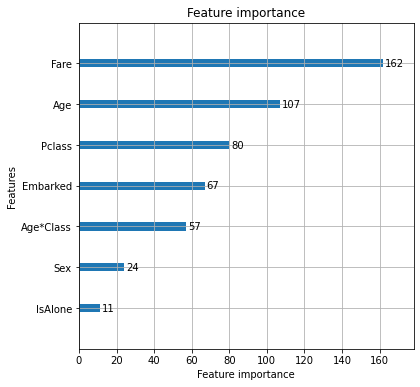

In [95]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize = (6,6))
plot_importance(lgbm_wrapper, max_num_features = 10, ax=ax)